In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
import scipy
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [342]:
url = 'https://raw.githubusercontent.com/Bhushan0130/Datasets/main/abalone.csv'
df = pd.read_csv(url)
df.head(2)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7


In [343]:
df.sample(2)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
603,I,0.470,0.345,0.115,0.4885,0.2005,0.108,0.166,11
635,M,0.355,0.265,0.090,0.1680,0.0500,0.041,0.063,8


In [344]:
df.tail(2)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.296,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,12


In [345]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [346]:
df.shape

(4177, 9)

In [347]:
df.isnull().sum().sum()

0

<AxesSubplot:>

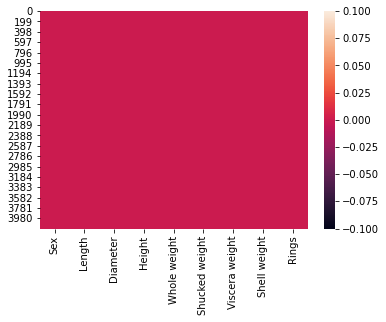

In [348]:
sns.heatmap(df.isnull())

In [349]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [350]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [351]:
df['Sex'] = le.fit_transform(df['Sex'])

In [352]:
df.head(2)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7


In [353]:
df.dtypes
float_col = df.select_dtypes(include = 'float64').keys()

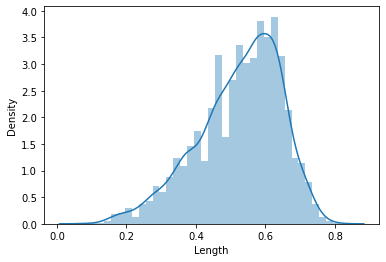

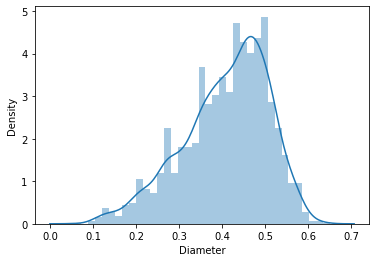

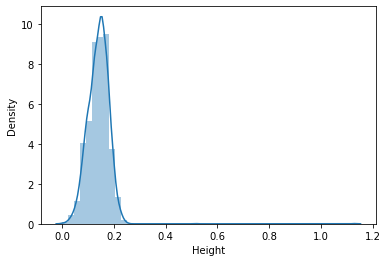

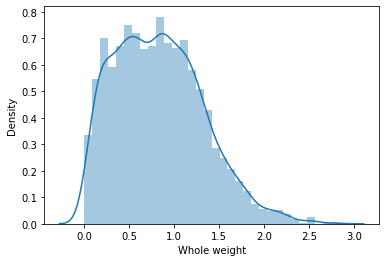

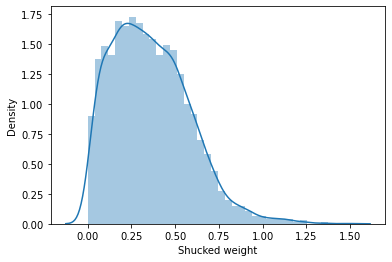

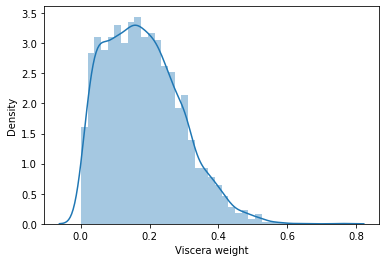

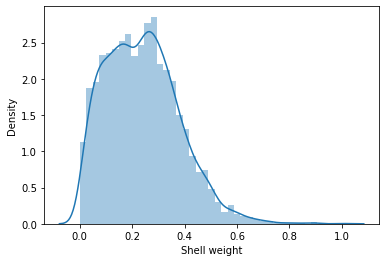

In [354]:
for var in float_col:
    plt.figure()
    sns.distplot(df[var])
    print('\n')
    plt.show()

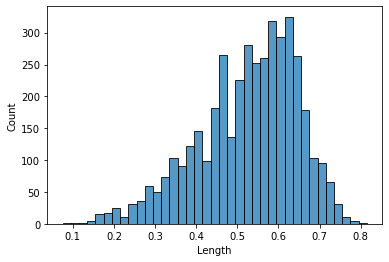

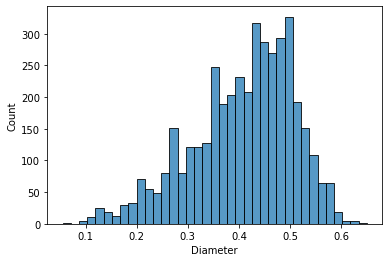

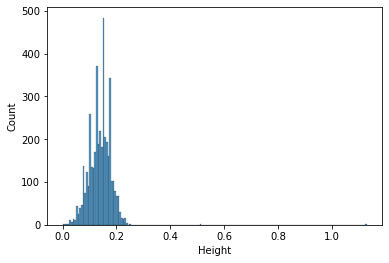

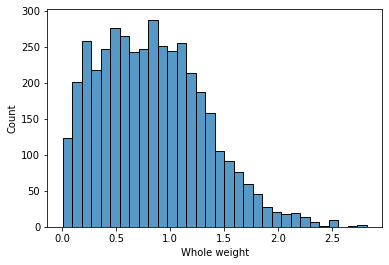

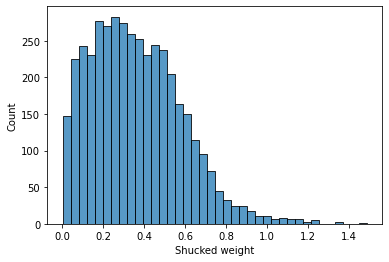

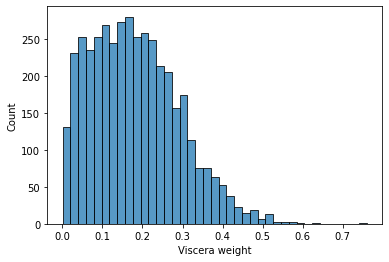

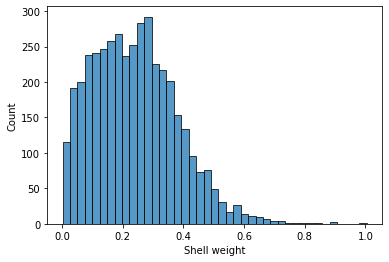

In [355]:
for var in float_col:
    plt.figure()
    sns.histplot(df[var])
    print('\n')
    plt.show()

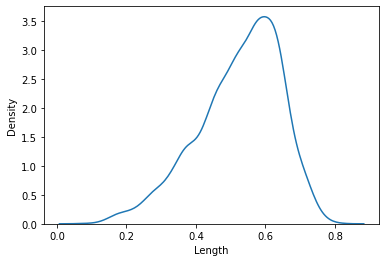

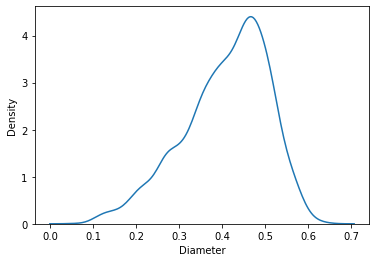

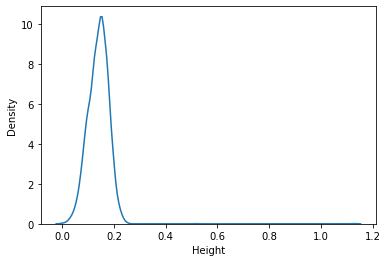

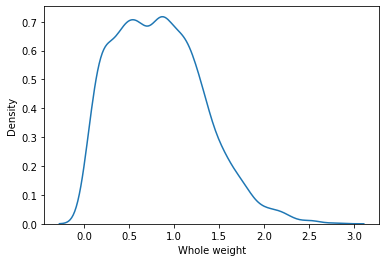

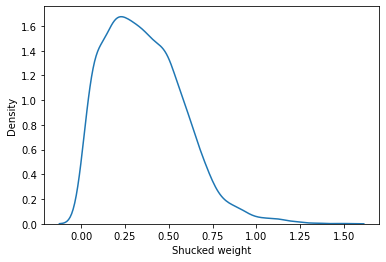

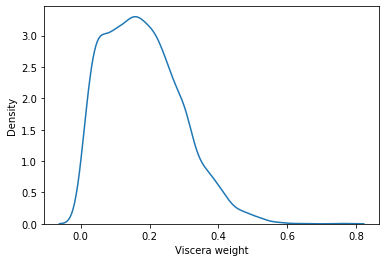

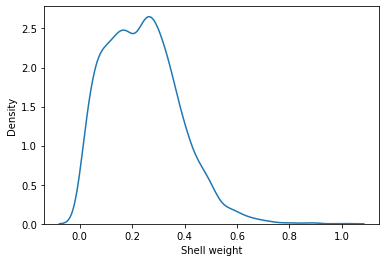

In [356]:
for var in float_col:
    plt.figure()
    sns.kdeplot(df[var])
    print('\n')
    plt.show()

In [357]:
# Bivariate

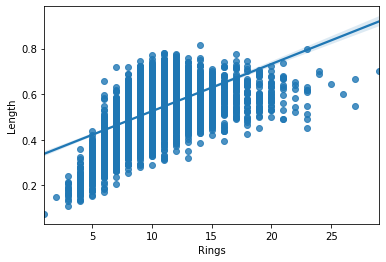

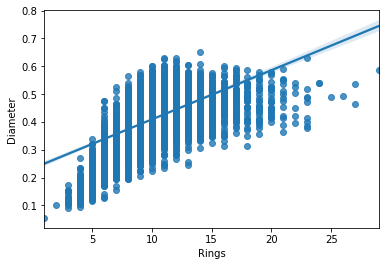

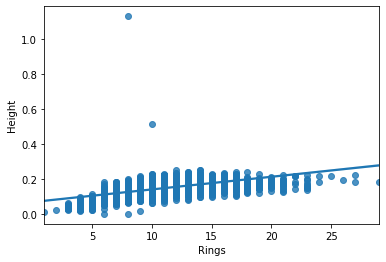

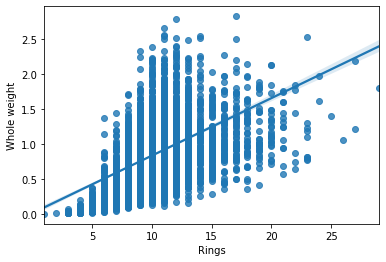

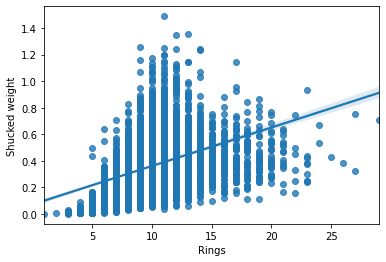

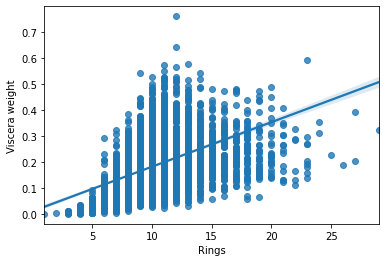

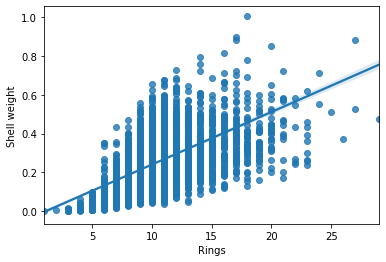

In [358]:
for var in float_col:
    plt.figure()
    sns.regplot(x = df['Rings'], y =df[var])
    print('\n')
    plt.show()

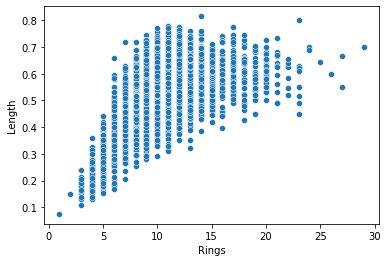

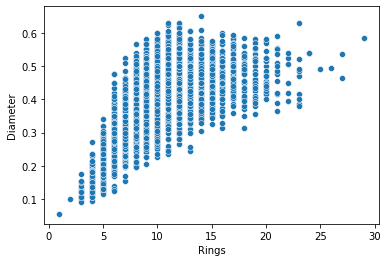

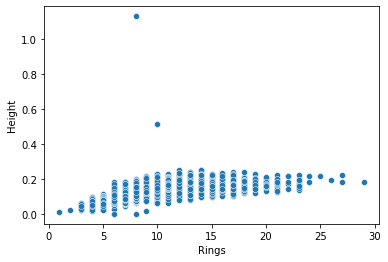

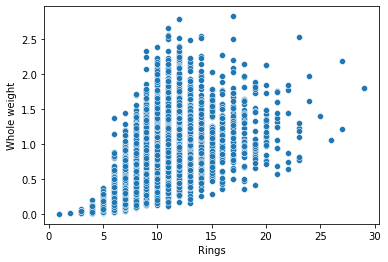

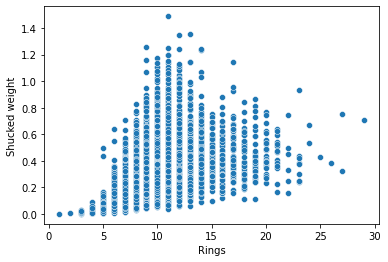

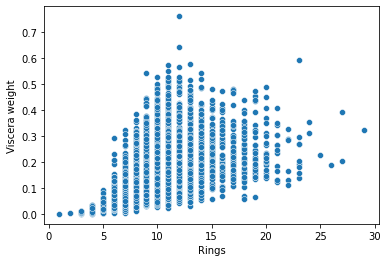

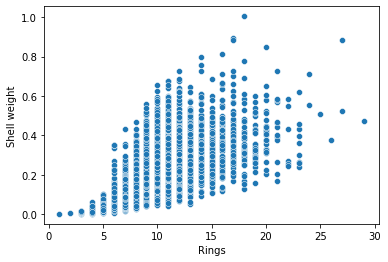

In [359]:
for var in float_col:
    plt.figure()
    sns.scatterplot(x = df['Rings'], y =df[var])
    print('\n')
    plt.show()

<Figure size 432x288 with 0 Axes>

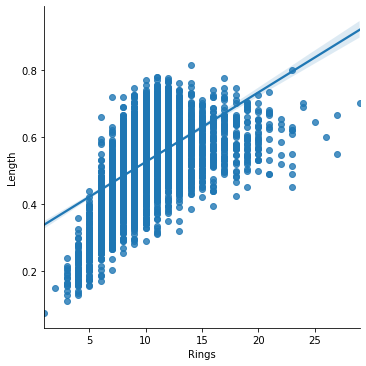

<Figure size 432x288 with 0 Axes>

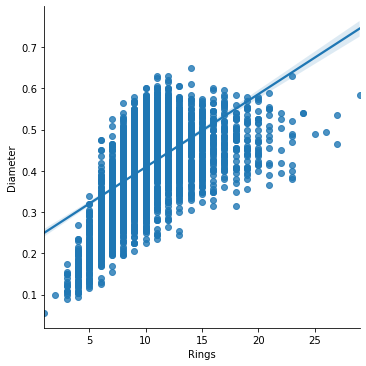

<Figure size 432x288 with 0 Axes>

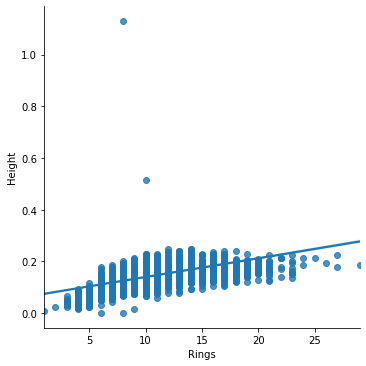

<Figure size 432x288 with 0 Axes>

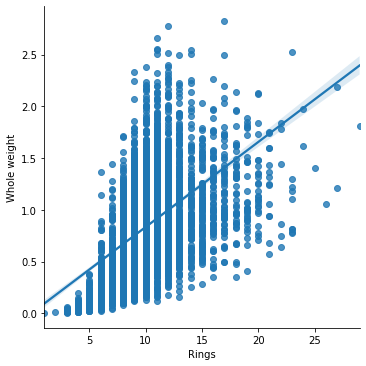

<Figure size 432x288 with 0 Axes>

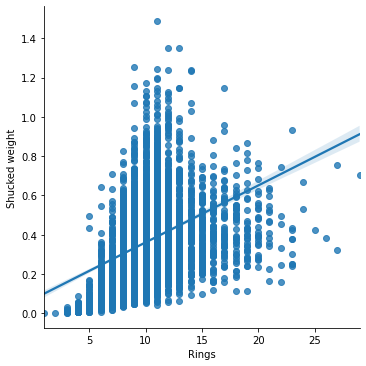

<Figure size 432x288 with 0 Axes>

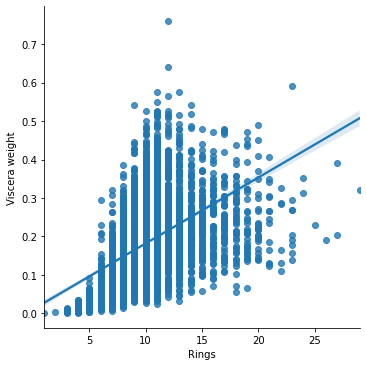

<Figure size 432x288 with 0 Axes>

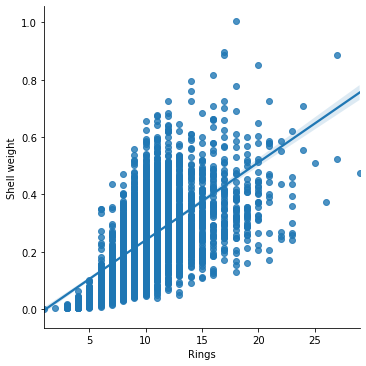

In [360]:
for var in float_col:
    plt.figure()
    sns.lmplot(x = 'Rings', y =var, data =  df)
    print('\n')
    plt.show()

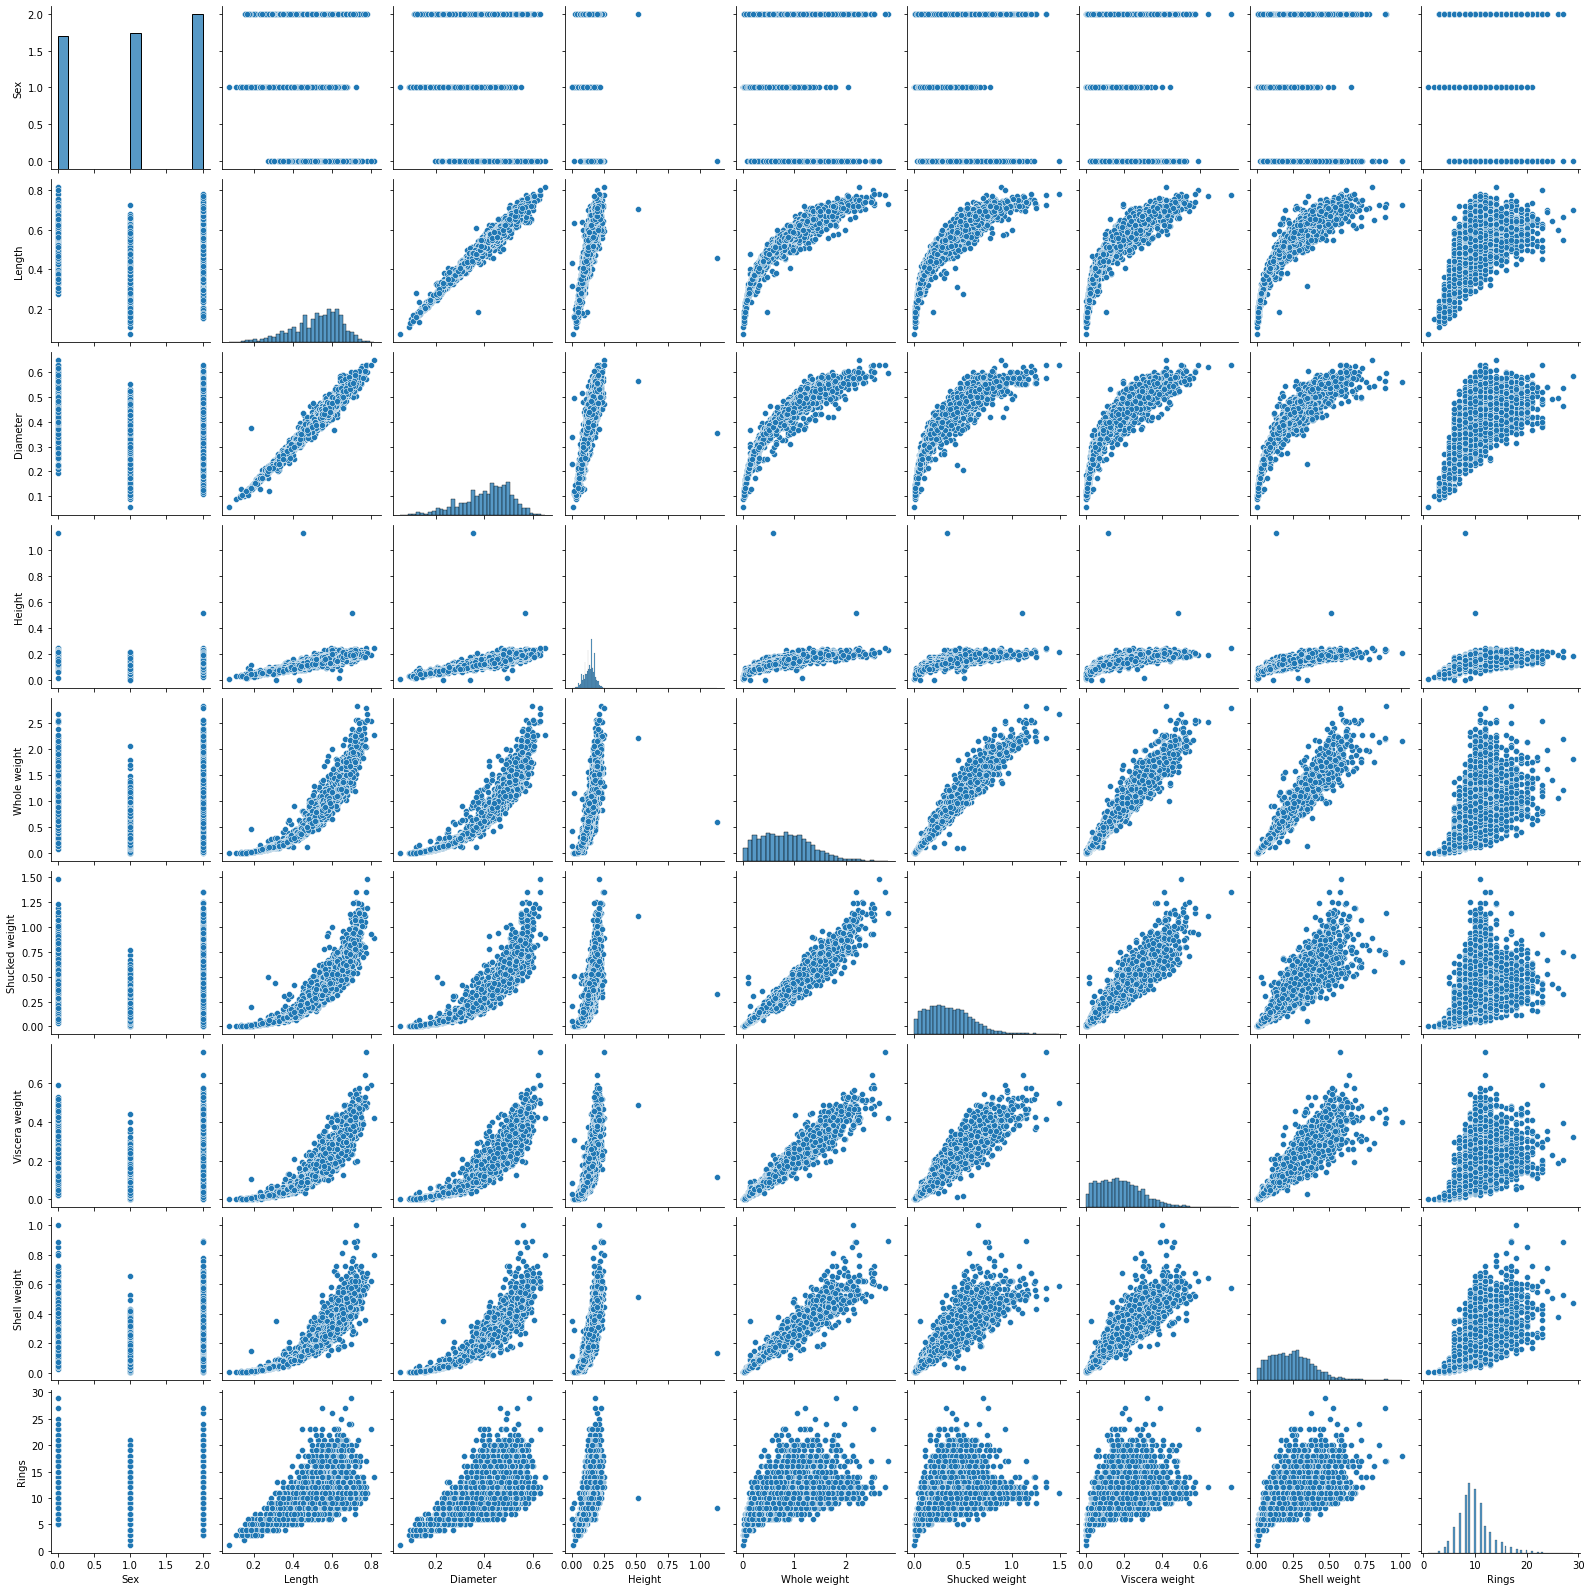

In [361]:
sns.pairplot(df)

In [362]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [363]:
# Observations----
# Mean of height column is greater than median. Hence it is right skewed. Similar with whole weight/shucked
# weight. Standard deviation is high in whole weight, shucked weight. It means data spread is high

# High gap between 75th percentile and max is present in rings. So few outliers is present.

In [364]:
# Remove outliers

In [365]:
from scipy.stats import zscore

In [366]:
z =  np.abs(zscore(df))
# df = df[(z<3).all(axis = 1)]
np.where(z>3)
df_z = df[(z<3).all(axis = 1)]
df_z.shape

(4027, 9)

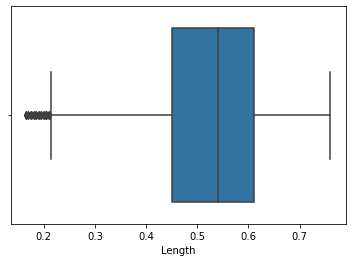

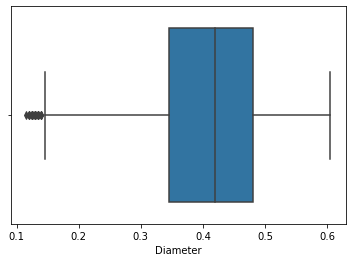

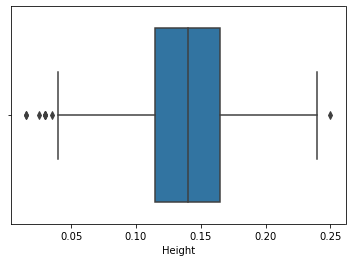

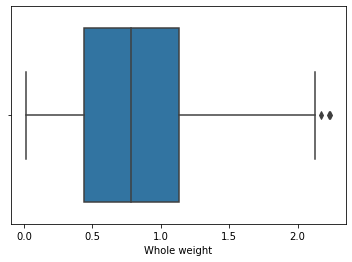

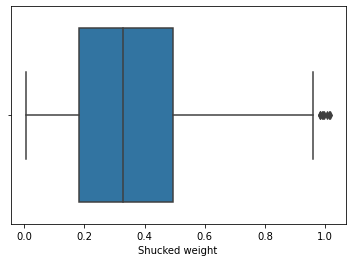

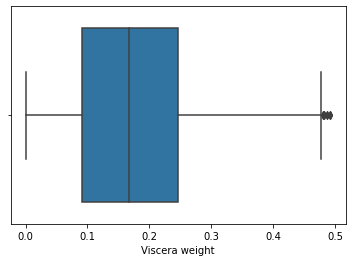

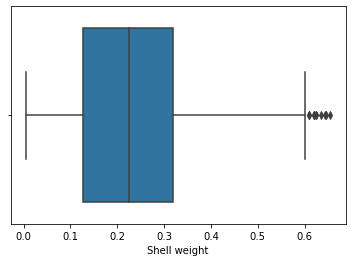

In [367]:
for var in float_col:
    plt.figure()
    sns.boxplot(df_z[var])
    print('\n')
    plt.show()

In [368]:
((df.shape[0] - df_z.shape[0] ) / df.shape[0]) *100


3.5910940866650707

In [369]:
# using IQR

In [370]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [371]:
# Removing outliers using IQR method (be carefull with the variables used here)

In [372]:
df_IQR = df[~( (df < (Q1 - 1.5*IQR)) | (df> (Q3 + 1.5*IQR) ) ).any(axis = 1)]
df_IQR.shape

(3781, 9)

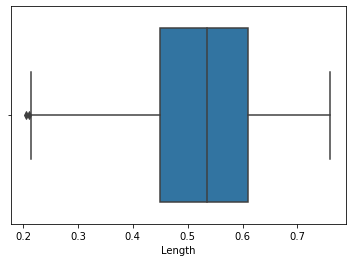

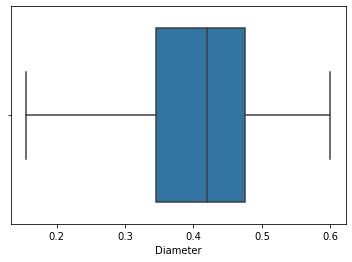

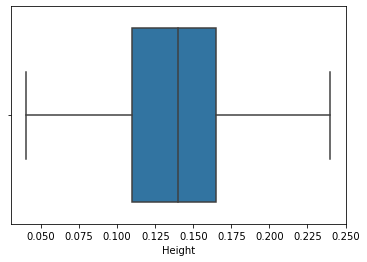

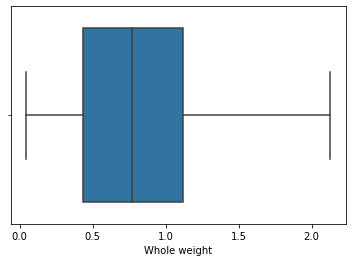

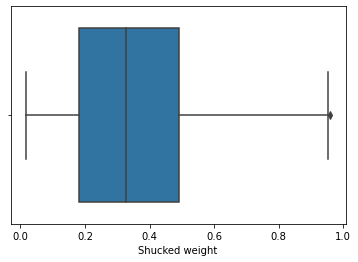

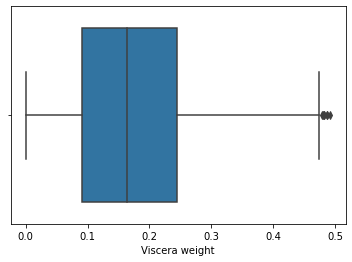

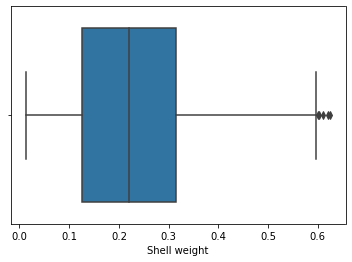

In [373]:
for var in float_col:
    plt.figure()
    sns.boxplot(df_IQR[var])
    print('\n')
    plt.show()

In [374]:
((df.shape[0] - df_IQR.shape[0] ) / df.shape[0]) *100

9.480488388795786

In [375]:
# less data occuring is occuring in zscore (3.5 approx)

In [376]:
z =  np.abs(zscore(df))
# df = df[(z<3).all(axis = 1)]
np.where(z>3)
df = df[(z<3).all(axis = 1)]
df.shape

(4027, 9)

In [377]:
df.skew()  # In maximum case after removing outliers skewness seems in acceptable range

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
dtype: float64

In [378]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.043639,-0.046531,-0.046282,-0.034776,-0.016457,-0.045292,-0.043825,-0.033272
Length,-0.043639,1.000000,0.986011,0.895432,0.934410,0.909245,0.907957,0.914518,0.567074
Diameter,-0.046531,0.986011,1.000000,0.901803,0.934069,0.904302,0.904192,0.921779,0.584978
Height,-0.046282,0.895432,0.901803,1.000000,0.891783,0.843010,0.869273,0.899716,0.612540
Whole weight,-0.034776,0.934410,0.934069,0.891783,1.000000,0.971024,0.966612,0.961216,0.548295
Shucked weight,-0.016457,0.909245,0.904302,0.843010,0.971024,1.000000,0.930154,0.896220,0.440424
Viscera weight,-0.045292,0.907957,0.904192,0.869273,0.966612,0.930154,1.000000,0.919414,0.522917
Shell weight,-0.043825,0.914518,0.921779,0.899716,0.961216,0.896220,0.919414,1.000000,0.622872
Rings,-0.033272,0.567074,0.584978,0.612540,0.548295,0.440424,0.522917,0.622872,1.000000


In [379]:
# MultiColinearity

<AxesSubplot:>

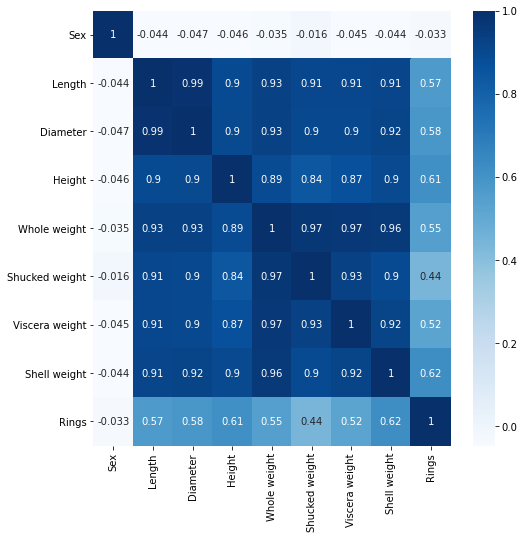

In [380]:
plt.figure(figsize = (8, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')

In [381]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [382]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [400]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
print('Shape of x: ', x.shape)
print('Shape of y:', y.shape)

Shape of x:  (4027, 8)
Shape of y: (4027,)


In [401]:
def cal_vif(data):
    vif = pd.DataFrame()
    vif['Feature Name'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1]) ]
    return (vif)

In [402]:
cal_vif(x)

,Feature Name,VIF
0,Sex,2.586539
1,Length,711.017756
2,Diameter,762.862946
3,Height,92.050181
4,Whole weight,441.600560
5,Shucked weight,108.511496
6,Viscera weight,65.669278
7,Shell weight,94.849108


In [403]:
# As observed from the heatmap
# length, shucked  columns need to remove

In [404]:
x.drop(columns= ['Length', 'Shucked weight'], axis = 1, inplace = True)

In [405]:
x.head(2)

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight
0,2,0.365,0.095,0.5140,0.1010,0.15
1,2,0.265,0.090,0.2255,0.0485,0.07


In [406]:
cal_vif(x)  # Multicolinerity still present but we can not drop all columns
# VIF is a part of feature engineering

,Feature Name,VIF
0,Sex,2.566983
1,Diameter,85.744656
2,Height,89.121231
3,Whole weight,132.613319
4,Viscera weight,61.181551
5,Shell weight,62.092580


In [414]:
# scaling 
x

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight
0,2,0.365,0.095,0.5140,0.1010,0.1500
1,2,0.265,0.090,0.2255,0.0485,0.0700
2,0,0.420,0.135,0.6770,0.1415,0.2100
3,2,0.365,0.125,0.5160,0.1140,0.1550
4,1,0.255,0.080,0.2050,0.0395,0.0550
...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2390,0.2490
4173,2,0.440,0.135,0.9660,0.2145,0.2605
4174,2,0.475,0.205,1.1760,0.2875,0.3080
4175,0,0.485,0.150,1.0945,0.2610,0.2960


In [410]:
# from sklearn.preprocessing import StandardScaler
# standard_s = StandardScaler()
# one = standard_s.fit_transform(x)
# new_df = pd.DataFrame(one, columns = x.columns)
# new_df

# As we can data is already scalled no need to scale this data.

In [416]:
# Machine learning

In [417]:
# LinearRegression

In [428]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [423]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 21)
print('x_train shape:' , x_train.shape)
print('y_train shape:' , y_train.shape)
print('x_test shape:' , x_test.shape)
print('y_test shape:' , y_test.shape)

x_train shape: (2818, 6)
y_train shape: (2818,)
x_test shape: (1209, 6)
y_test shape: (1209,)


In [430]:
linear_r = LinearRegression()
linear_r.fit(x_train, y_train)
lr_predict = linear_r.predict(x_test)

print('r2_score: ', r2_score(y_test, lr_predict))
print('mean_squared_error: ', mean_squared_error(y_test, lr_predict))
print('mean_absolute_error: ', mean_absolute_error(y_test, lr_predict))

r2_score:  0.4545361747572704
mean_squared_error:  4.505324807954238
mean_absolute_error:  1.5708039196661936
